In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import pickle
import os
from matplotlib import pyplot as plt
if os.name == "nt":
    plt.rcParams["font.family"] = "Meiryo"
elif os.name == "posix":
    plt.rcParams["font.family"] = "Hiragino Sans"

In [2]:
df = pd.read_pickle("../.dump/cos_dist.pkl")

In [7]:
in_artist = df.loc[(df.a_artist==df.b_artist)&(df.a_song!='representative')].copy()

In [17]:
type(artist_dist)

pandas.core.series.Series

In [56]:
artist_dist = in_artist.groupby('a_artist').cos_dis.agg(list)
artist_dist = artist_dist.apply(lambda x: np.asarray(x))
artists = np.asarray(artist_dist.index.tolist())
artist_dist = np.vstack(artist_dist.to_list())

In [59]:
vars = np.var(artist_dist,axis=1)
artist_dist_sorted = artist_dist[np.argsort(vars)]
artists_sorted = artists[np.argsort(vars)]

In [76]:
cmap = plt.get_cmap('coolwarm',len(artists))

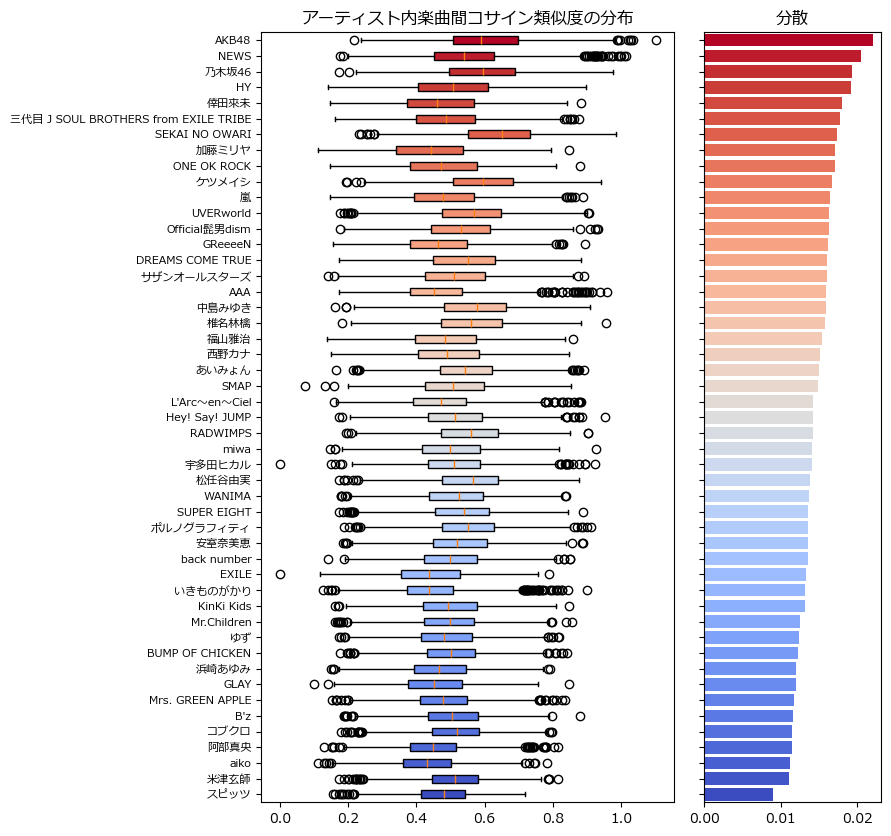

In [89]:
fig, axes = plt.subplots(
    ncols=2,
    figsize=(8, 10),
    gridspec_kw={
        "width_ratios": [7, 3],
        "wspace": 0.1,
    },
    sharey=True
)

ax = axes[0]
bp = ax.boxplot(artist_dist_sorted.T,orientation="horizontal",patch_artist=True)
for i,b in enumerate(bp['boxes']):
    b.set_facecolor(cmap(i)) # boxの色
ax.set_yticks(range(1,len(artists_sorted)+1))
ax.set_yticklabels(artists_sorted,ha='right',fontsize=8)
ax.set_title('アーティスト内楽曲間コサイン類似度の分布')

ax = axes[1]
ax.barh(np.arange(1,len(vars)+1),np.sort(vars),color=[cmap(i) for i in range(len(artists))])
ax.set_yticks(np.arange(1,len(vars)+1))
ax.set_yticklabels(artists_sorted,ha='right',fontsize=8)
ax.set_title('分散')
plt.show()